# Imports

In [31]:
import csv 
from matricesRalas import *
import matplotlib.pyplot as plt


### Auxiliares

- Calcular diferencia entre vectores(A:MatrizRala, B:MatrizRala)

- Build graph(rangex:int, yvalues:List)

- Generar identidad(m:int)

- Generar inversa(A:MatrizRala)

- Generar W(citas:csvfile)

- Generar D(W:MatrizRala)

- Generar citas(papers:csvfile)

- Genrar p_star(W:MatrizRala,D:MatrizRala,d:int)

- Convergencia(d:int,W:MatrizRala,D:MatrizRala)

In [32]:
def build_graph(rangex:int, y_axis):
    # Graficar la diferencia absoluta vs. t
    plt.figure()
    plt.plot(range(rangex), y_axis, label='Diferencia Absoluta')
    plt.xlabel('Iteraciones (t)')
    plt.ylabel('Diferencia Absoluta')
    plt.title('Convergencia del Método Iterativo')
    plt.legend()
    plt.grid(True)
    plt.show() 

In [33]:
def generarW(citas):
    #tengo que tener agarrar la primer columna entera de papers csv 
    #cada posicion me da el nuumero del paper = paper + 1
    #ahora tengo que linkear cada con citas csv para crear la matriz
    #pj cita a pi id1 cita a id2 => W{id2,id1} =  1
    #1. crear matriz rala con dimension numero max de citas.csv m y n el mismo numero
    #2. recorrer citas csv por cada row ponerle set item (id2,id1) v=1
    
    #despues seria sobre len(ids)
    W = MatrizRala(20,20)  
          
    with open(citas, newline='') as csvfile:
        reader = csv.reader(csvfile)
        next(reader) #skipping the header
        for row in reader:
            #no existe el 0 en el papaer numero 1 2 3 4 5 etc
            id2 = int(row[1])-1
            id1 = int(row[0])-1
            W.__setitem__((id2,id1),1)
            
    return W
            

In [34]:
def generarD(W:MatrizRala):
    resultado = MatrizRala(W.shape[0],W.shape[1])
    
    for i in range(W.shape[0]):
        cantidad_1s = 0
        for j in range(W.shape[0]):
            if W[i,j] == 1:
                cantidad_1s += 1
        if cantidad_1s != 0:
            resultado[i,i] = 1/cantidad_1s
        
    return resultado

In [35]:
#ids de papers 
def generarIDs(paper):
    ids = []
    nombres = []
    
    with open(paper, newline='',encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)
        for row in reader:
            ids.append(row[0])
            nombres.append(row[1])
            # cada posicion de ids nos dice la citacion que vamos a hacer en W
    
    return ids,nombres

In [36]:
def convergencia(d,W,D):
    
    epsilon = 0.0000000001
    
    N = W.shape[0]
    
    #distribucion equiprobable 
    p_t = MatrizRala.getVectorOne(N) * (1/ N)
        
    #matriz de unos
    unos = MatrizRala.getVectorOne(N)
    
    diff_abs = []
    contador = 0    
    diff = 1
    parte_div = (1 - d) / N
    dWD = d * W @ D

    while diff > epsilon:
        if contador != 0:
            p_t = p_t_mas1.__copy__()
        
        #caculos intermedios
        dWDP_t = dWD @ p_t
        p_t_mas1 = parte_div * unos + dWDP_t
        
        #calcular la diferencia con p* osea seria entre p* o p_t
        diff = MatrizRala.diffVectors(p_t_mas1,p_t) 
        diff_abs.append(diff)
        contador +=1 
   
    
    return contador, diff_abs, p_t_mas1
    

Generar las matrices $\mathbf{W}$ y $\mathbf{D}$ a partir de la tabla citas.csv. Utilizar matrices ralas.

In [37]:
citas = 'papers/citas.csv'
#data acortada 
citas2 = 'papers/citas2.csv'

W:MatrizRala = MatrizRala.getW(citas2)
D:MatrizRala = W.getD()
print(W)
# print(D)



N: = 31
MatrizRala([ 
    [ 0  0  1  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  ]
    [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  ]
    [ 0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  ]
    [ 1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  ]
    [ 1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  ]
    [ 0  0  0  1  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  ]
    [ 1  0  0  1  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  ]
    [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  ]
    [ 0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  ]
    [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

Debido al tamaño del conjunto de datos, no podemos resolver explıcitamente usando Gauss-Jordan el sistema. Utilizando d = 0,85 y asumiendo una distribucion equiprobable para el tiempo 1, computar pt hasta que la serie converja. Es decir, que la diferencia $∥p_{t+1} − p_{t}∥$ sea menor a cierto $ϵ > 0$.

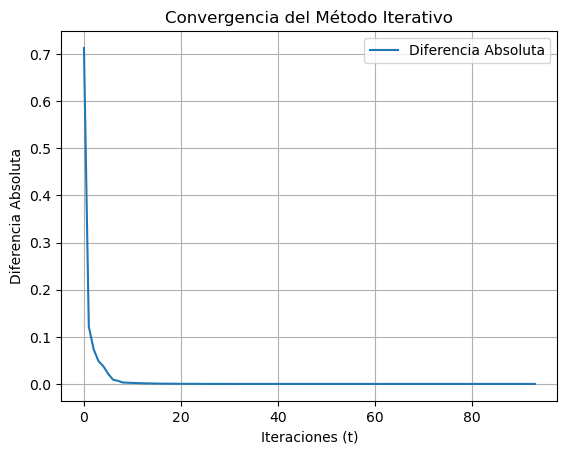

In [38]:
d = 0.85
t, diffs,p_sol = convergencia(d,W,D)



build_graph(t,diffs)

Armar la lista de los 10 papers con mayor impacto. Comparar los resultados con aquellos obtenidos
utilizando unicamente la cantidad de citas. ¿Que conclusiones se pueden sacar?, ¿Que algoritmo parece
dar resultados mas satisfactorios?

In [42]:
# los 10 papers con mas influencia seria los que en el vecto r de probabilidades tienen la probabilidad mas alta ?
# sacar la posicion del vector de probabilidades 
# ir a la listaa de id con la posicion sacar el id y encontrarlo en el csv 
# sino directmaente ir al csv y buscar la posicion esa y sacar el nombre o la fila completa y guardar eso tipo saber cual es el numero 1 2 3 4 ... 10
# recorrer W y fijarte cual es la que tiene mas cantidad de citas , sacar la posicion de esas (modificar la funcion que crea D)
# papers = 'papers/papers.csv'
# TOP_PAPAERS = 10
# IDS,nombres = generarIDs(papers)
# print(nombres[:TOP_PAPAERS+1])

####

p_solNumpy = p_sol.toNumpy()
# ordenar de mayor a menor
argSort = np.argsort(p_solNumpy, axis=0)[::-1]# ordena de mayor a menor
p_solNumpy = np.sort(p_solNumpy, axis=0)[::-1]

# print(p_solNumpy[:10])
# print(type(p_solNumpy))

# print(np.sum(p_solNumpy))

print(argSort)


# vectorRala = MatrizRala.fromNumpy(vectorNumpy)
# print(vectorRala)


[[ 6]
 [ 4]
 [ 0]
 [ 2]
 [ 8]
 [ 3]
 [ 5]
 [ 7]
 [ 9]
 [15]
 [ 1]
 [18]
 [20]
 [21]
 [28]
 [27]
 [26]
 [25]
 [24]
 [23]
 [22]
 [10]
 [19]
 [11]
 [12]
 [13]
 [14]
 [29]
 [16]
 [17]
 [30]]


In [ ]:
# argSort
# with open(dataPath,newline='') as csvfile:
#     reader = csv.reader(csvfile)
#     next(reader)
        
#     N = sum(1 for row in reader)
#     csvfile.close()